<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2005%20-%20Interpret/%20Entrega_05_Interpret_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OBTAIN


In [27]:
# Imports
# Data import and manipulation
import pandas as pd

# Math
import numpy as np
# Seeding the whole notebook (although in general I also always set my random
# state manually when it is an option)
np.random.seed(543)

# Some statistics, including some checks for normality and skew
from scipy import stats
from scipy.stats import norm, skew

# Create a train-test split, so we reserve some data for testing
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
# Prettier visualizations
import seaborn as sns
# Sets the default style for seaborn, adding the nice darkgrid background
sns.set()

In [85]:
!git clone https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129


Cloning into '79acab35be50eaf1c383948ed3fd1129'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [100]:
df = pd.read_csv('/content/79acab35be50eaf1c383948ed3fd1129/winemag-data-130k-v2.csv', index_col=0)
df.head()


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Los datos en las columnas de descripción y designación revelarán qué tipo de vino es en muchos casos. Tampoco nos interesan los detalles sobre el catador del vino. Además, la información de región tiene mucha variedad pero no nos da tantos más datos que país, provincia y bodega. Por lo tanto, eliminaremos esas columnas, así como el título de cada vino, y dejaremos solo las columnas que esperamos funcionen como predictores potenciales de variedad.

###SCRUB

In [110]:
df.describe()

,points,price
count,65499.000000,60829.000000
mean,88.434037,35.232932
std,3.030310,39.477858
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,2500.000000


In [111]:
#Comprobando las dimensiones
df.shape

(65499, 13)

In [112]:
#comprobando si hay alguna inconsistencia en el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                65467 non-null  object 
 1   description            65499 non-null  object 
 2   designation            46588 non-null  object 
 3   points                 65499 non-null  int64  
 4   price                  60829 non-null  float64
 5   province               65467 non-null  object 
 6   region_1               54744 non-null  object 
 7   region_2               25170 non-null  object 
 8   taster_name            51856 non-null  object 
 9   taster_twitter_handle  49467 non-null  object 
 10  title                  65499 non-null  object 
 11  variety                65499 non-null  object 
 12  winery                 65499 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 7.0+ MB


In [113]:

# función para investigar los valores faltantes en el conjunto de datos de vino
def MissingValues(df): #creating the function
    total = df.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print(df[~(df['Total'] == 0)])# Returning values of nulls different of 0
    
    return

MissingValues(winedf)


                       Total    Percent
region_2               40329  61.571932
designation            18911  28.872197
taster_twitter_handle  16032  24.476710
taster_name            13643  20.829326
region_1               10755  16.420098
price                   4670   7.129880
country                   32   0.048856
province                  32   0.048856


In [114]:
#Lista completa de funciones, con o sin datos faltantes
winedf.isna().sum()


country                     32
description                  0
designation              18911
points                       0
price                     4670
province                    32
region_1                 10755
region_2                 40329
taster_name              13643
taster_twitter_handle    16032
title                        0
variety                      0
winery                       0
dtype: int64

In [115]:
#Reduzca los datos a mis dos características de interés y la variable de destino, datos limpios
winedf = winedf[['points', 'price', 'description']].copy()
winedf = winedf.dropna().reset_index(drop=True)

In [116]:
len(winedf)

60829

In [ ]:
# Compruebo si hay duplicados, lo que a menudo es valioso, pero en este caso reduce el conjunto de datos en un factor de 5
# Esto elimina demasiados valores, volverá si hay tiempo
# winedf = winedf[winedf.duplicated('description', keep=False)]

# len(winedf) después de duplicado eliminado = 20026, no vale la pena realizar esta operación

###EXPLORE

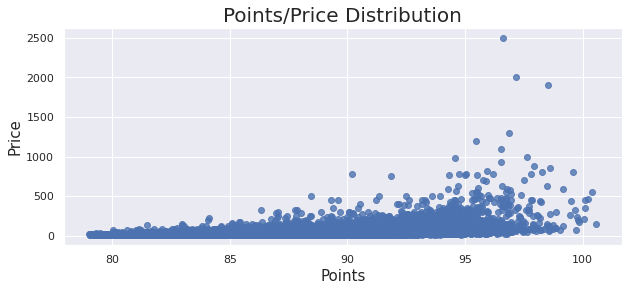

In [117]:
#Algunos valores atípicos a tener en cuenta
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price', data=winedf, x_jitter=True, fit_reg=False)
g.set_title("Points/Price Distribution", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price", fontsize= 15)

plt.show()

In [118]:
#Crea una nueva columna que se usará en el modelado
#obteniendo el recuento de palabras de cada descripción de vino como una variable
winedf2 = winedf.assign(desc_length = winedf['description'].apply(len))
winedf2.head()


,points,price,description,desc_length
0,87,15.0,"This is ripe and fruity, a wine that is smooth...",227
1,87,14.0,"Tart and snappy, the flavors of lime flesh and...",186
2,87,13.0,"Pineapple rind, lemon pith and orange blossom ...",199
3,87,65.0,"Much like the regular bottling from 2012, this...",249
4,87,15.0,Blackberry and raspberry aromas show a typical...,261


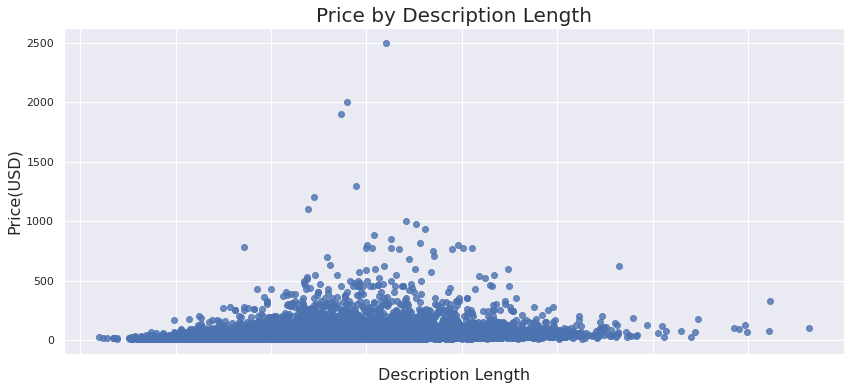

In [119]:
# Comparar Descripción Longitud con Precio
plt.figure(figsize=(14,6))
g = sns.regplot(x='desc_length', y='price', data=winedf2, fit_reg=False)
g.set_title('Price by Description Length', fontsize=20)
g.set_ylabel('Price(USD)', fontsize = 16) 
g.set_xlabel('Description Length', fontsize = 16)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
plt.show()

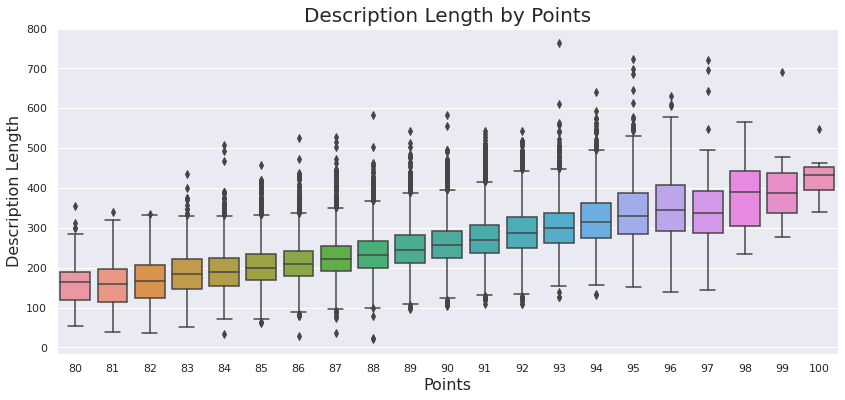

In [120]:
#Esto presagia que la clasificación puede no ser el mejor modelo aquí.
#Una regresión lineal probablemente sería un modelo más preciso,
#pero sometámoslo a una prueba de clasificación para estar seguros
plt.figure(figsize=(14,6))
g = sns.boxplot(x='points', y='desc_length', data=winedf2)
g.set_title('Description Length by Points', fontsize=20)
g.set_ylabel('Description Length', fontsize = 16) # Y label
g.set_xlabel('Points', fontsize = 16) # X label
plt.show()


###MODEL